In [131]:
# Basic Import
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Modelling
from sklearn.linear_model import LinearRegression, Ridge, Lasso # Linear Regression
from sklearn.linear_model import LogisticRegression # Logistic Regression
from sklearn.neighbors import KNeighborsRegressor # K-Nearest Neighbors Regression
from sklearn.tree import DecisionTreeRegressor # Decision Tree Regression
from sklearn.svm import SVR # Support Vector Machine Regression
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor # Random Forest Regression
from xgboost import XGBRegressor # XGBoost Regression
from sklearn.neighbors import KNeighborsClassifier # K-Nearest Neighbors Classifier
from sklearn.tree import DecisionTreeClassifier # Decision Tree Classifier
from sklearn.naive_bayes import GaussianNB # Naive Bayes Classifier
from sklearn.svm import SVC # Support Vector Machine Classifier
from sklearn.ensemble import RandomForestClassifier # Random Forest Classifier
from sklearn.cluster import KMeans # K-Means Clustering

from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score , mean_absolute_error
from sklearn.metrics import classification_report, accuracy_score

In [132]:
url  = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
column_names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"]
iris_data = pd.read_csv(url, names=column_names)

In [133]:
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [134]:
# Check Missing values
iris_data.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [135]:
# Check Duplicates
iris_data.duplicated().sum()

3

In [136]:
# Checking the number of unique values of each column
iris_data.nunique()

sepal_length    35
sepal_width     23
petal_length    43
petal_width     22
species          3
dtype: int64

In [137]:
iris_data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


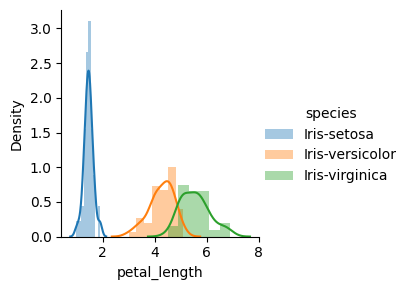

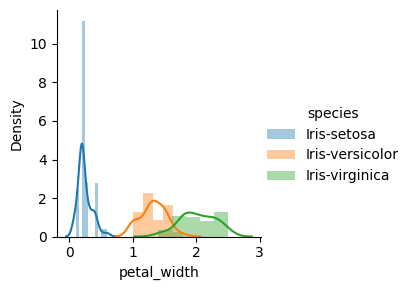

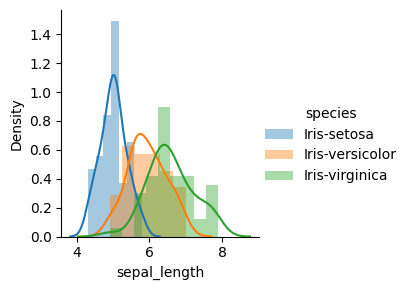

In [138]:
sns.FacetGrid(iris_data,hue="species").map(sns.distplot,"petal_length").add_legend()
sns.FacetGrid(iris_data,hue="species").map(sns.distplot,"petal_width").add_legend()
sns.FacetGrid(iris_data,hue="species").map(sns.distplot,"sepal_length").add_legend()
plt.show()

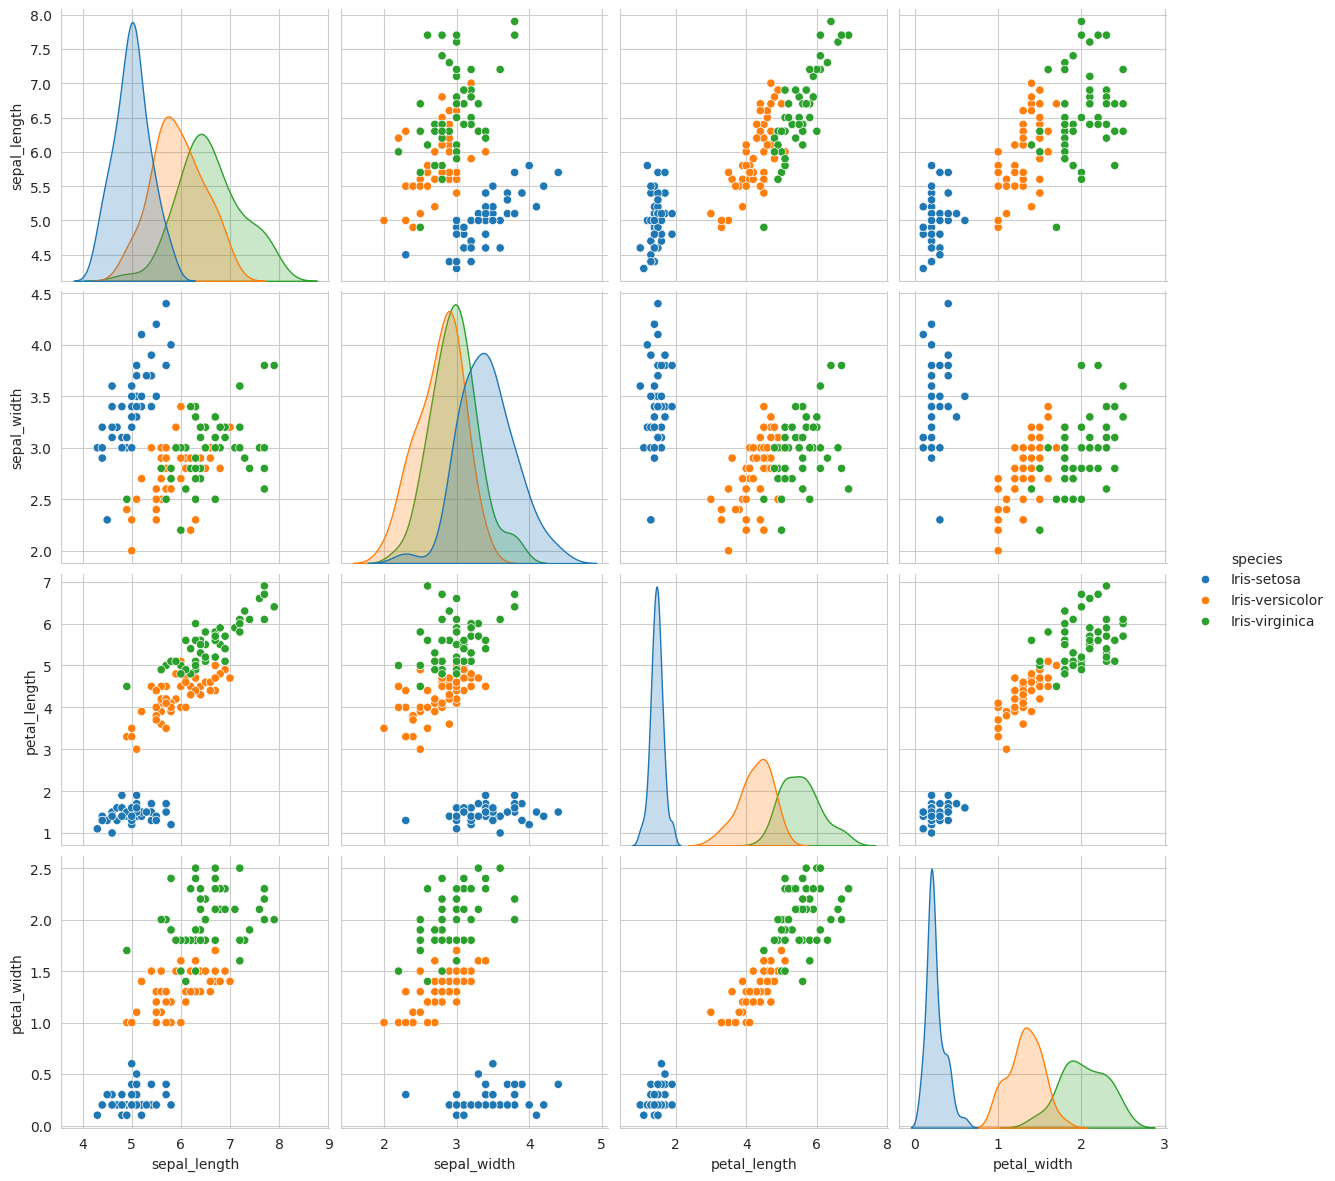

In [139]:
sns.set_style("whitegrid")
sns.pairplot(iris_data,hue="species",size=3);
plt.show()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64


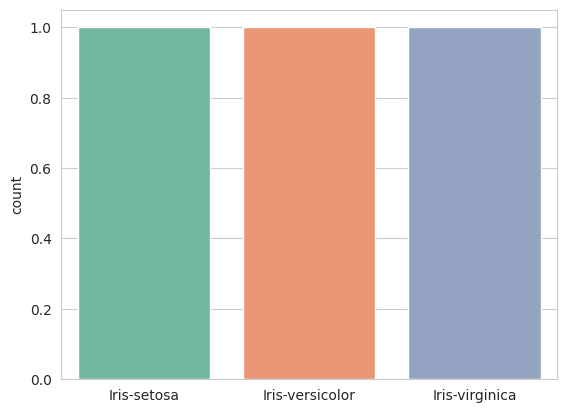

In [140]:
print(iris_data['species'].value_counts())
sns.countplot(iris_data['species'].value_counts(), palette = "Set2");

# Label Encoder

In [141]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
iris_data['species']= le.fit_transform(iris_data['species'])
iris_data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [142]:
x = iris_data.drop("species", axis=1)
x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [143]:
y = iris_data["species"]
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int64

# Coorelation Matrix

In [144]:
iris_data.corr()

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,-0.109369,0.871754,0.817954,0.782561
sepal_width,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
petal_length,0.871754,-0.420516,1.000000,0.962757,0.949043
petal_width,0.817954,-0.356544,0.962757,1.000000,0.956464
species,0.782561,-0.419446,0.949043,0.956464,1.000000


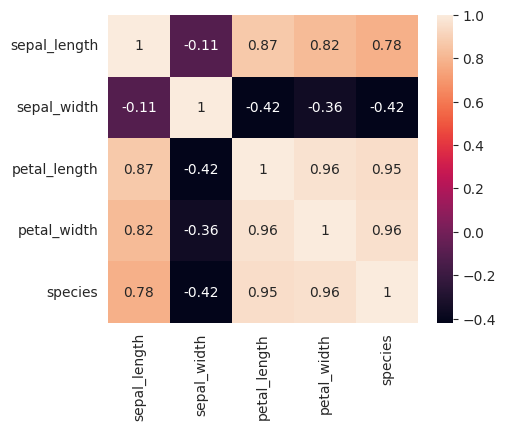

In [145]:
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(iris_data.corr(), annot=True, ax=ax);

# Split the Data Into Train and Test Datasets

In [146]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42)
x_train.shape , x_test.shape

((112, 4), (38, 4))

# Create an Evaluate Function to give all metrics after model Training

In [147]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [148]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "Logistic Regression" : LogisticRegression(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree Regressor":DecisionTreeRegressor(),
    "Support Vector Machine Regressor" : SVR(kernel = 'linear'),
    "Random Forest Regressor": RandomForestRegressor(),
    "AdaBoost Regressor": AdaBoostRegressor(),
    "XGBRegressor": XGBRegressor(),
    "K-Neighbors Classifier": KNeighborsClassifier(),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "Naive Bayes Classifier" : GaussianNB(),
    "Support Vector Machine Classifier" : SVC(kernel = 'linear'),
    "Random Forest Classifier": RandomForestClassifier(),
    "K-Means Clustering" : KMeans()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)


    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')

    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)

    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 0.2244
- Mean Absolute Error: 0.1745
- R2 Score: 0.9226
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.1903
- Mean Absolute Error: 0.1448
- R2 Score: 0.9486


Lasso
Model performance for Training set
- Root Mean Squared Error: 0.6350
- Mean Absolute Error: 0.5375
- R2 Score: 0.3806
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.6591
- Mean Absolute Error: 0.5780
- R2 Score: 0.3831


Ridge
Model performance for Training set
- Root Mean Squared Error: 0.2249
- Mean Absolute Error: 0.1753
- R2 Score: 0.9223
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.1953
- Mean Absolute Error: 0.1484
- R2 Score: 0.9458


Logistic Regression
Model performance for Training set
- Root Mean Squared Error: 0.1890
- Mean Absolute Error: 0.0357
- R2 Score: 0.9451
-------------------------

In [149]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
3,Logistic Regression,1.000000
5,Decision Tree Regressor,1.000000
10,K-Neighbors Classifier,1.000000
11,Decision Tree Classifier,1.000000
12,Naive Bayes Classifier,1.000000
13,Support Vector Machine Classifier,1.000000
14,Random Forest Classifier,1.000000
7,Random Forest Regressor,0.998382
9,XGBRegressor,0.998126
4,K-Neighbors Regressor,0.983559


**Naive Bayes Classifier**

In [150]:
model = GaussianNB()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 100.00


# Confusion matrix

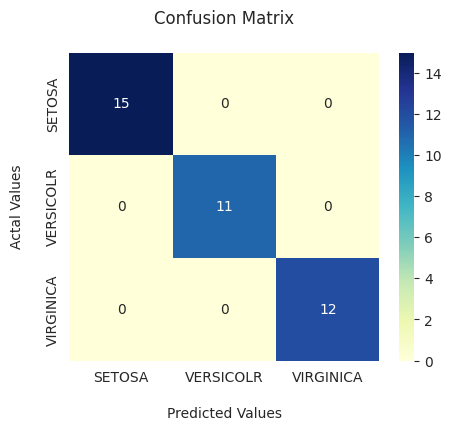

In [151]:
from sklearn.metrics import confusion_matrix

# predict the results using predict method
y_pred=model.predict(x_test)

# Creating a dataframe for Confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm,
                     index = ['SETOSA','VERSICOLR','VIRGINICA'],
                     columns = ['SETOSA','VERSICOLR','VIRGINICA'])

# Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True, cmap='YlGnBu')
plt.title('Confusion Matrix\n')
plt.ylabel('Actal Values\n')
plt.xlabel('\nPredicted Values')
plt.show()

# Plot y_pred and y_test

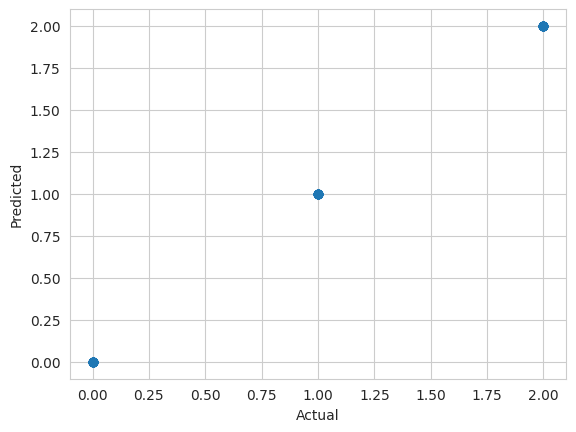

In [152]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

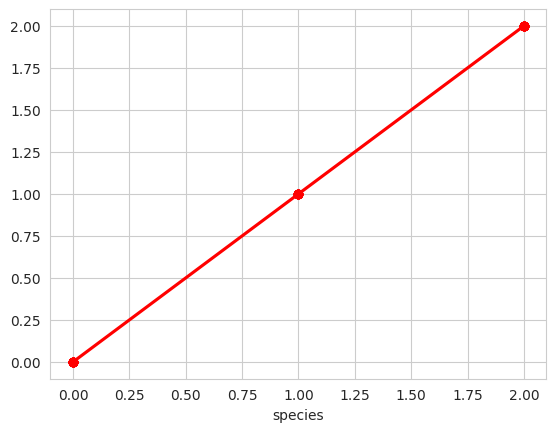

In [153]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

# Classification Report

In [154]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



In [155]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
73,1,1,0
18,0,0,0
118,2,2,0
78,1,1,0
76,1,1,0
31,0,0,0
64,1,1,0
141,2,2,0
68,1,1,0
82,1,1,0


# Predict data from the model assuming new values

In [156]:
iris_data['species']= le.inverse_transform(iris_data['species'])
iris_data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [157]:
new_data = pd.DataFrame({"sepal_length":[6.7],"sepal_width":6.5,"petal_length":3.4,"petal_width":2.9})
prediction = model.predict(new_data)
prediction= le.inverse_transform(prediction)
prediction[0]

'Iris-virginica'

In [158]:
# Checking the accuracy of the given range
iris_data.iloc[100:]

,sepal_length,sepal_width,petal_length,petal_width,species
100,6.3,3.3,6.0,2.5,Iris-virginica
101,5.8,2.7,5.1,1.9,Iris-virginica
102,7.1,3.0,5.9,2.1,Iris-virginica
103,6.3,2.9,5.6,1.8,Iris-virginica
104,6.5,3.0,5.8,2.2,Iris-virginica
105,7.6,3.0,6.6,2.1,Iris-virginica
106,4.9,2.5,4.5,1.7,Iris-virginica
107,7.3,2.9,6.3,1.8,Iris-virginica
108,6.7,2.5,5.8,1.8,Iris-virginica
109,7.2,3.6,6.1,2.5,Iris-virginica


In [159]:
# Save the model
!pip install skops
import skops.io as sio
sio.dump(model, "classifier.skops")

In [160]:
# Load the model
load_model = sio.load("classifier.skops",trusted=True)